In [1]:
import pandas as pd

In [3]:
#get data from local in diff files

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")


In [5]:
#merge data test and gender file data

test_merged = pd.merge(test, gender, on="PassengerId", how="left")

In [7]:
train["Source"] = "train"
test_merged["Source"] = "test"

In [9]:
#combile that merge data and other file data and save in another csv file

common_cols = train.columns.intersection(test_merged.columns)
combined = pd.concat([train[common_cols], test_merged[common_cols]], ignore_index=True)

In [11]:
combined.to_csv("combined_titanic_data.csv", index=False)
print(combined.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Source  
0      0         A/5 21171   7.2500   NaN        S  train  
1      0          PC 17599  71.2833   C85        C  train  
2      0  STON/O2. 3101282   7.9250   NaN        S  train  
3      0            113803  53.1000  C123        S  train  
4      0            

In [13]:
#read that newly genrated combined csv file 

TITANIC = pd.read_csv("combined_titanic_data.csv")

In [15]:
# Check for missing values in each column
TITANIC.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Source            0
dtype: int64

In [17]:
#replace null with 0
TITANIC.fillna(0, inplace=True)


In [19]:
TITANIC.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Source         0
dtype: int64

In [23]:
#replace blank with 0
TITANIC.replace('', 0, inplace=True)


In [25]:
combined.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,2
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,train
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,891
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN


In [27]:
#counts the survive rate as per pclass
TITANIC['Survived'].value_counts()
TITANIC['Sex'].value_counts()
TITANIC['Pclass'].value_counts()


Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [29]:
TITANIC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


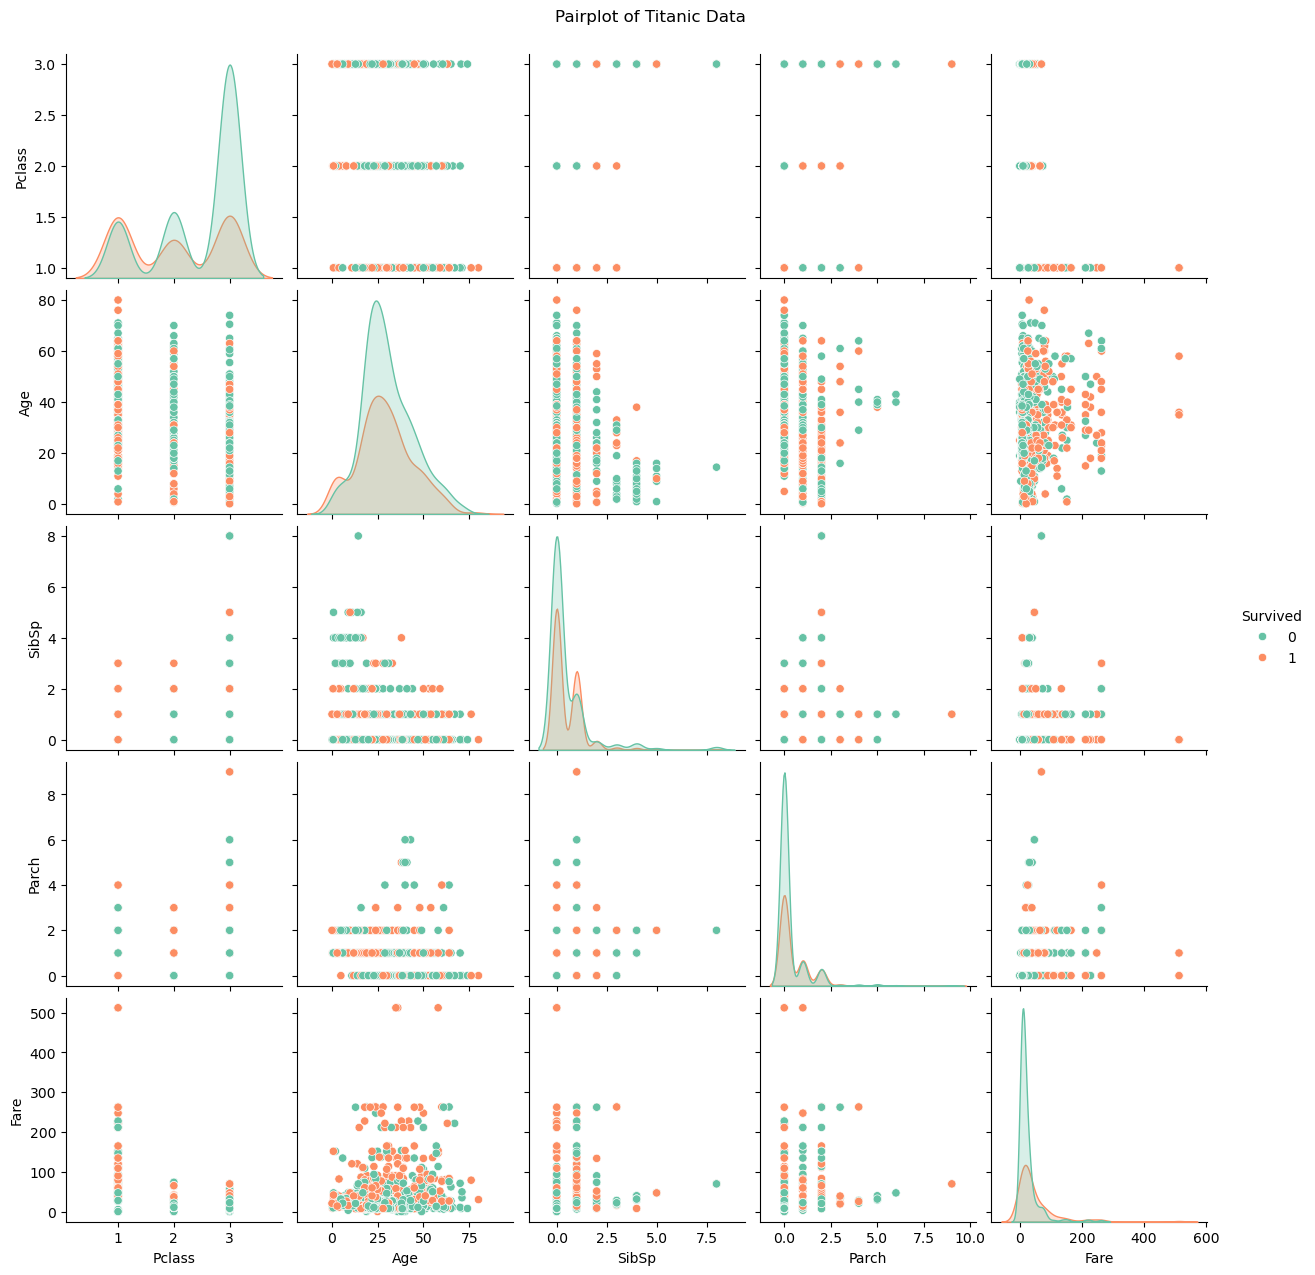

In [33]:
#data visualization

import seaborn as sns
import matplotlib.pyplot as plt


numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

sns.pairplot(combined[numeric_cols], hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Titanic Data', y=1.02)
plt.show()


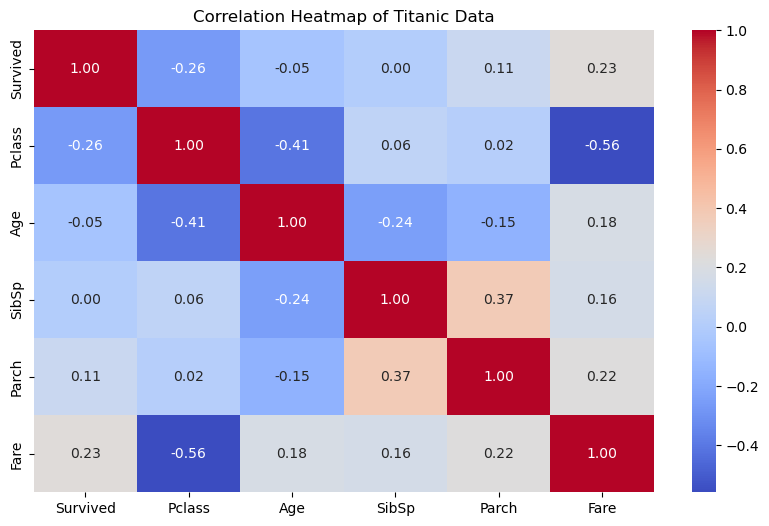

In [35]:
# Compute correlation matrix
corr_matrix = combined[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Data')
plt.show()


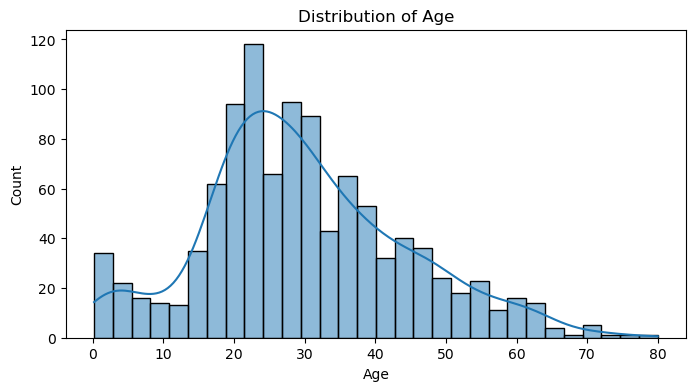

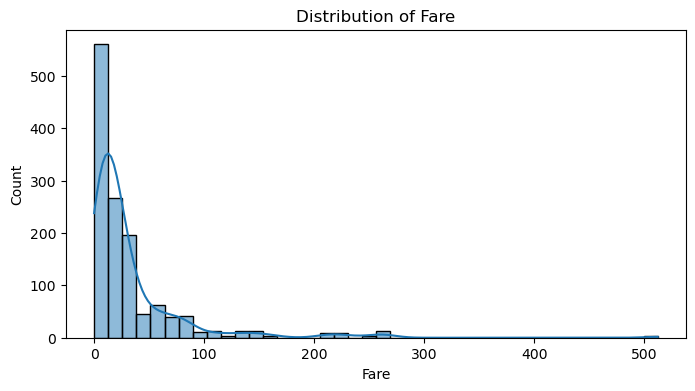

In [37]:
# Histogram for Age
plt.figure(figsize=(8, 4))
sns.histplot(data=combined, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Histogram for Fare
plt.figure(figsize=(8, 4))
sns.histplot(data=combined, x='Fare', bins=40, kde=True)
plt.title('Distribution of Fare')
plt.show()

In [ ]:
Relationship n trends
#Higher-class passengers (First-Class) had a much higher chance of survival, likely because of better access to lifeboats and a more favorable location on the ship.

#Women and children had better survival rates due to the "women and children first" evacuation protocol.

#Smaller family sizes led to better survival odds, likely because of fewer logistical challenges during the evacuation.

#Passengers from Cherbourg had better survival odds, possibly due to less crowding and better lifeboat access.

#Older adults had a lower survival rate, possibly due to physical limitations during evacuation.

#Ticket fare was correlated with survival, with passengers paying more having better access to life-saving resources.

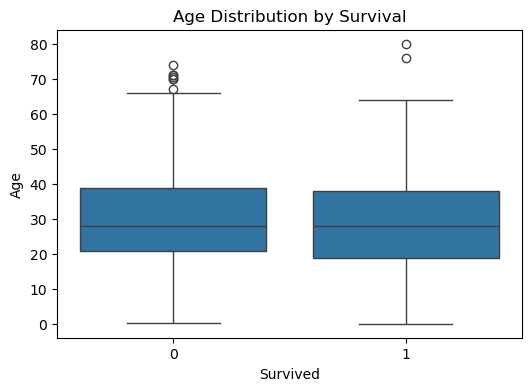

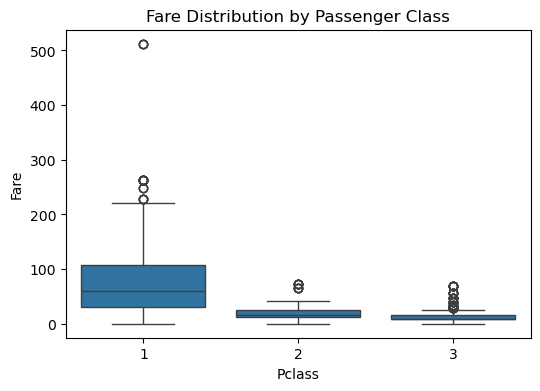

In [39]:
# Boxplot: Age vs Survived
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=combined)
plt.title('Age Distribution by Survival')
plt.show()

# Boxplot: Fare vs Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=combined)
plt.title('Fare Distribution by Passenger Class')
plt.show()


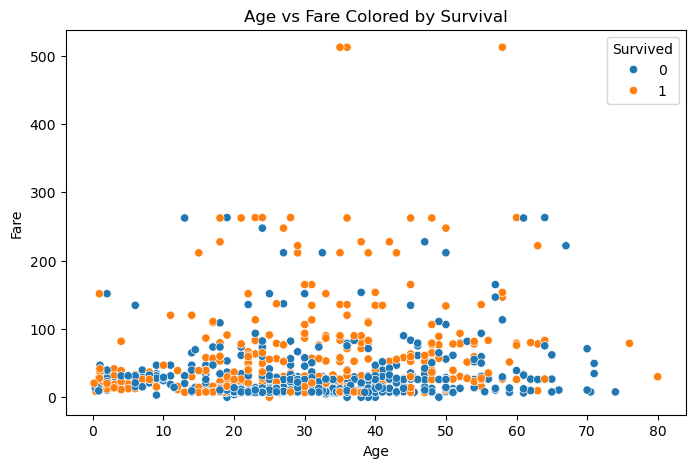

In [41]:
# Scatterplot: Age vs Fare colored by Survived
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=combined)
plt.title('Age vs Fare Colored by Survival')
plt.show()


In [ ]:
 Histogram
The majority were working-age adults, while infants and young children were a minority.
Wealthier passengers skew the higher end, and fare correlates with passenger class (Pclass)

Boxplot
Younger passengers, particularly children, were more likely to survive.
First-class passengers paid much more, while third-class fares were the lowest with less variation.
Fare is strongly linked to Pclass, reflecting wealth and social status.

Scatterplot

Survivors were mostly in the higher fare, younger-to-middle age range, while non-survivors were in the lower fare section..
Higher fare and younger age were linked to higher survival chances, indicating better access to lifeboats and cabins.